# Seaborn

In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("C:\\Users\\ashish\\Downloads\\Netflix_sample_500 (1).csv")
display(df.head(5))

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Title 1,Director A,Actor E,United Kingdom,2020-03-09,2008,R,5 Seasons,Action & Adventure
1,s2,Movie,Title 2,Director C,"Actor A, Actor B",India,2019-10-10,2020,PG-13,84 min,Children & Family Movies
2,s3,TV Show,Title 3,Director D,NaN,India,2020-09-03,2004,PG-13,2 Seasons,Comedies
3,s4,Movie,Title 4,Director C,"Actor A, Actor B",United Kingdom,2019-10-06,2004,PG,4 Seasons,Documentaries
4,s5,Movie,Title 5,Director B,NaN,France,2020-03-05,2007,PG-13,1 Seasons,Comedies


## Count of Movies vs TV Shows

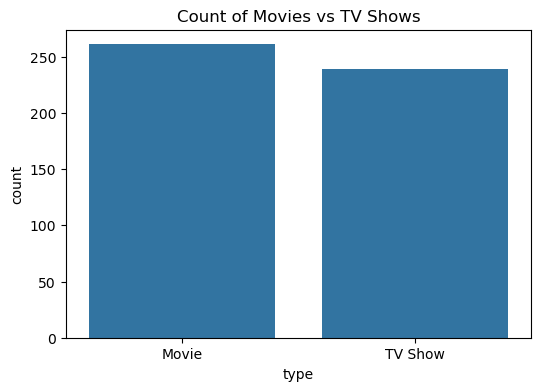

In [9]:
plt.figure(figsize=(6,4))
sns.countplot(x="type", data=df)
plt.title("Count of Movies vs TV Shows")
plt.show()

## Distribution of Release Years

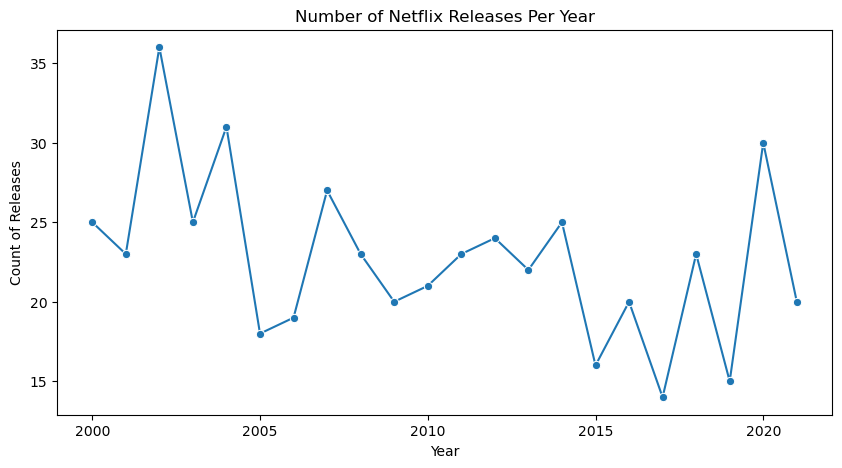

In [4]:
releases_per_year = df.groupby('release_year').size().reset_index(name='count')
plt.figure(figsize=(10,5))
sns.lineplot(data=releases_per_year, x='release_year', y='count', marker='o')
plt.title("Number of Netflix Releases Per Year")
plt.xlabel("Year")
plt.ylabel("Count of Releases")
plt.show()

## . Top 10 Countries by Content

C:\Users\ashish\AppData\Local\Temp\ipykernel_13524\2680517808.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette="viridis")


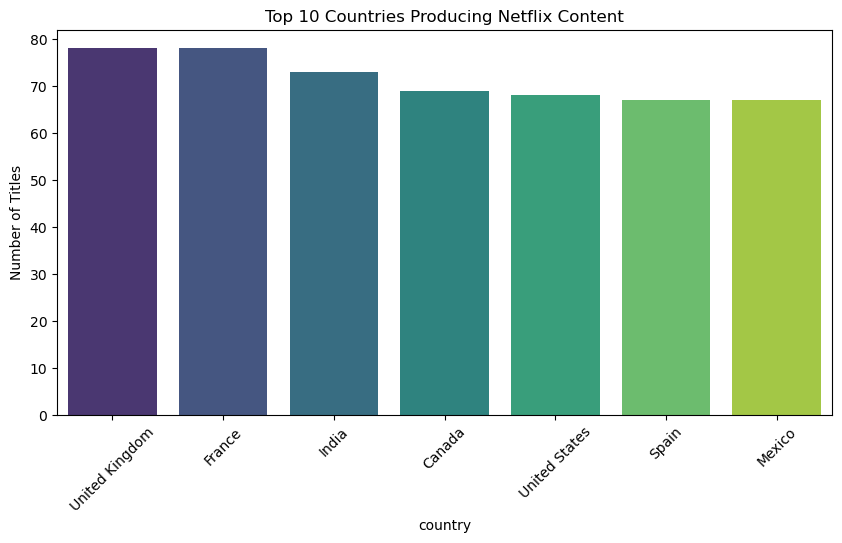

In [14]:
plt.figure(figsize=(10,5))
top_countries = df["country"].value_counts().head(10)
sns.barplot(x=top_countries.index, y=top_countries.values, palette="viridis")
plt.title("Top 10 Countries Producing Netflix Content")
plt.xticks(rotation=45)
plt.ylabel("Number of Titles")
plt.show()


## Ratings Distribution

C:\Users\ashish\AppData\Local\Temp\ipykernel_13524\1657793199.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="rating", data=df, order=df["rating"].value_counts().index, palette="pastel")


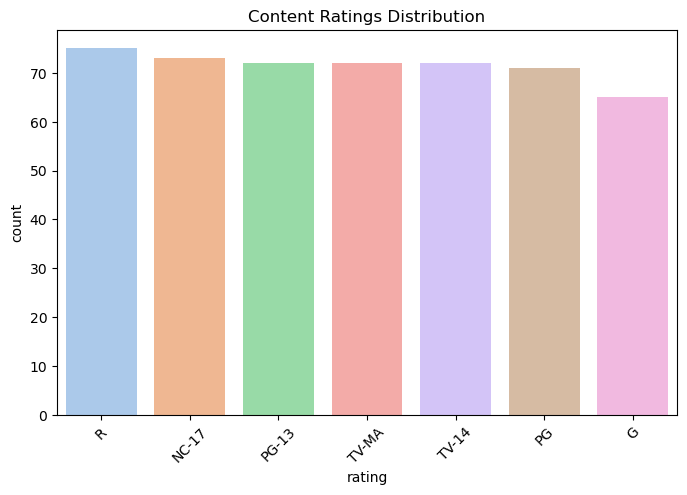

In [15]:
plt.figure(figsize=(8,5))
sns.countplot(x="rating", data=df, order=df["rating"].value_counts().index, palette="pastel")
plt.title("Content Ratings Distribution")
plt.xticks(rotation=45)
plt.show()


## Duration (Movies vs TV Shows)

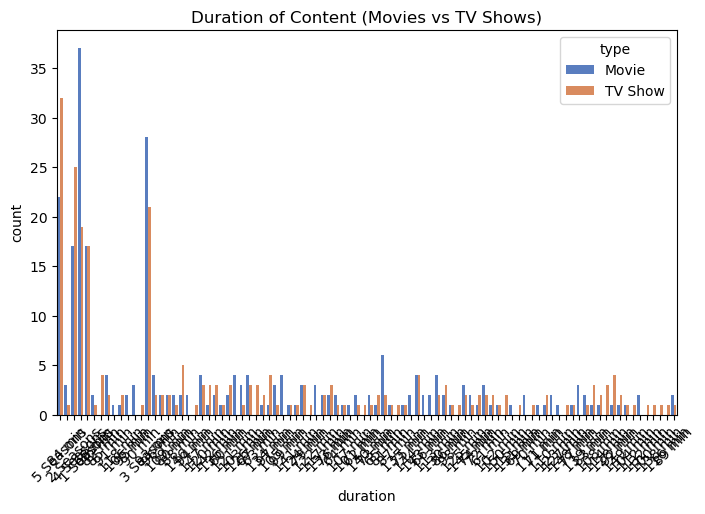

In [16]:
plt.figure(figsize=(8,5))
sns.countplot(x="duration", hue="type", data=df, palette="muted")
plt.title("Duration of Content (Movies vs TV Shows)")
plt.xticks(rotation=45)
plt.show()

## Movies vs TV Shows Pie Chart

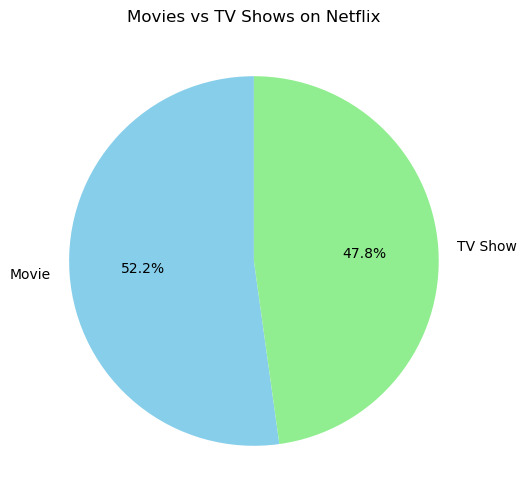

In [17]:
counts = df["type"].value_counts()
plt.figure(figsize=(6,6))
plt.pie(counts, labels=counts.index, autopct="%1.1f%%", startangle=90, colors=["skyblue","lightgreen"])
plt.title("Movies vs TV Shows on Netflix")
plt.show()

## Top 5 Countries Pie Chart

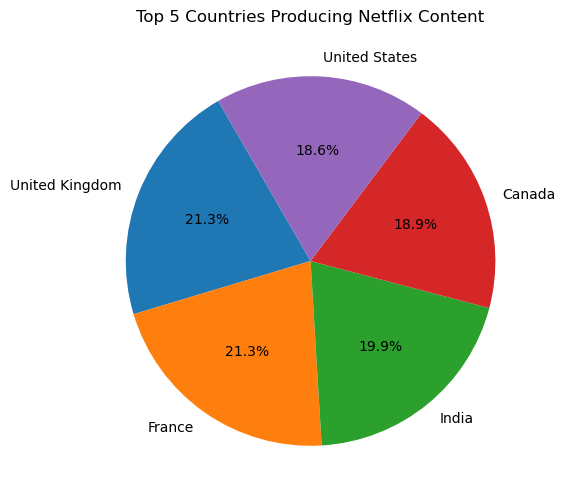

In [18]:
countries = df["country"].value_counts().head(5)
plt.figure(figsize=(6,6))
plt.pie(countries, labels=countries.index, autopct="%1.1f%%", startangle=120)
plt.title("Top 5 Countries Producing Netflix Content")
plt.show()

## Count Plot by Rating

C:\Users\ashish\AppData\Local\Temp\ipykernel_13524\1093290862.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="rating", data=df, order=df["rating"].value_counts().index, palette="muted")


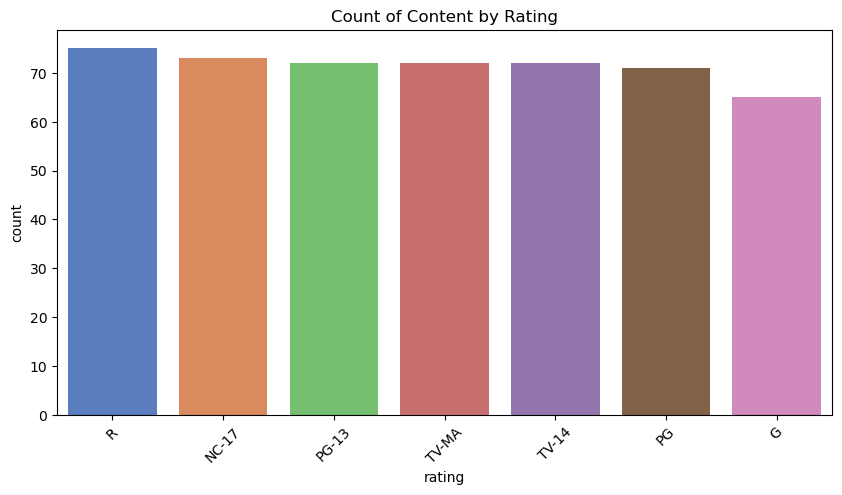

In [19]:
plt.figure(figsize=(10,5))
sns.countplot(x="rating", data=df, order=df["rating"].value_counts().index, palette="muted")
plt.title("Count of Content by Rating")
plt.xticks(rotation=45)
plt.show()

## Number of releases per year

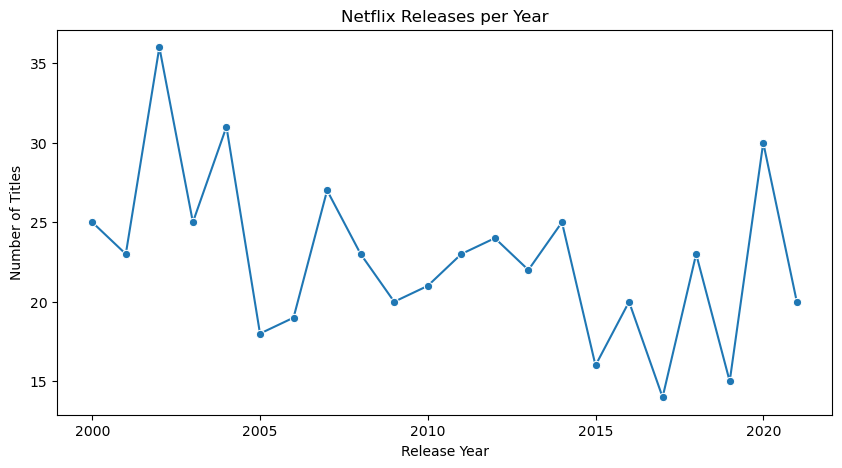

In [20]:
plt.figure(figsize=(10,5))
releases_per_year = df["release_year"].value_counts().sort_index()

sns.lineplot(x=releases_per_year.index, y=releases_per_year.values, marker="o")
plt.title("Netflix Releases per Year")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.show()

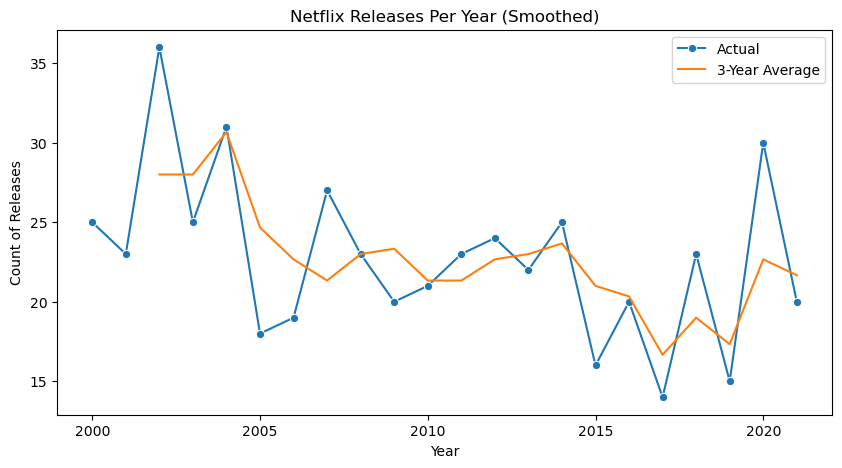

In [5]:
releases_per_year['rolling'] = releases_per_year['count'].rolling(3).mean()

plt.figure(figsize=(10,5))
sns.lineplot(data=releases_per_year, x='release_year', y='count', marker='o', label="Actual")
sns.lineplot(data=releases_per_year, x='release_year', y='rolling', label="3-Year Average")
plt.title("Netflix Releases Per Year (Smoothed)")
plt.xlabel("Year")
plt.ylabel("Count of Releases")
plt.show()